In [ ]:
#Importanto as bibliotecas necessárias 
import cv2 #Biblioteca OpenCV, utilizada para o processamento digital de imagens
from google.colab.patches import cv2_imshow # Função para o colab exibir imagens do OpenCV
import numpy as np
import matplotlib.pyplot as plt
import copy
from skimage.metrics import structural_similarity
from PIL import Image

from google.colab import drive #Para importar do drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


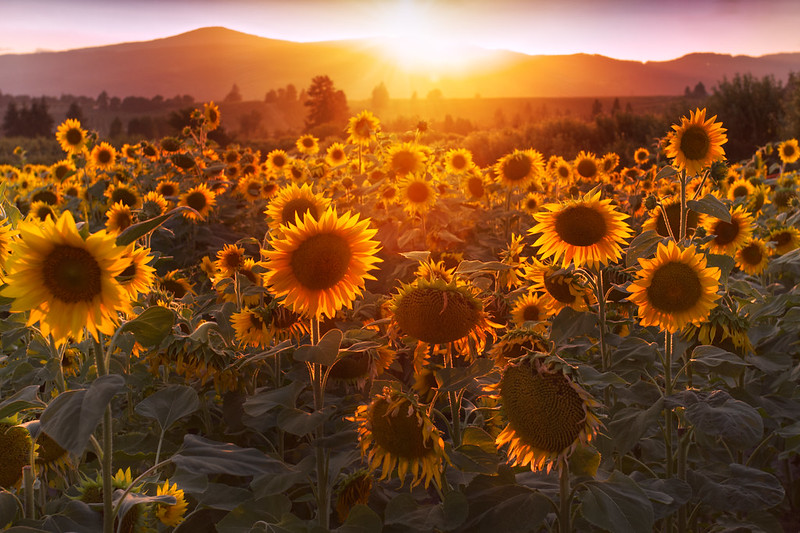

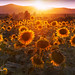

In [ ]:
# importanto as imagens nas 2 resoluções

img_high = cv2.imread('/content/drive/MyDrive/PIM_imagens/girassol_high.jpg')
cv2_imshow(img_high)
print('\n\n')
img_low = cv2.imread('/content/drive/MyDrive/PIM_imagens/girassol_low.jpg')
cv2_imshow(img_low)

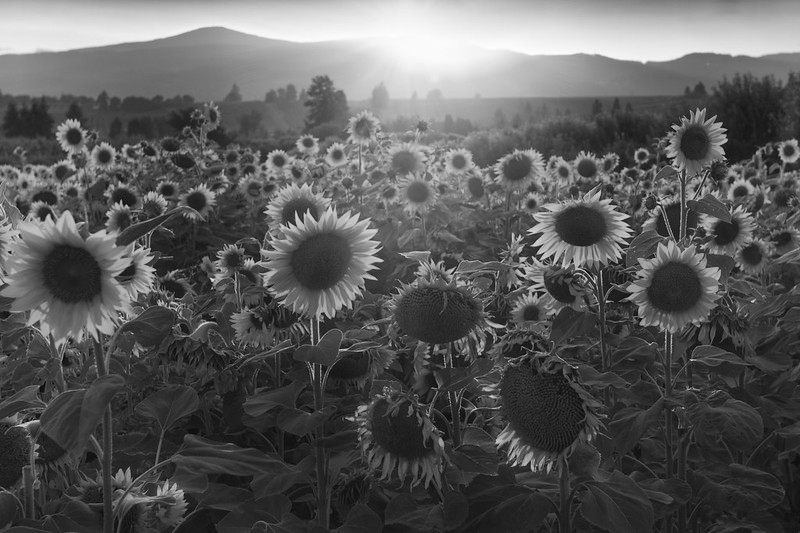

(533, 800)





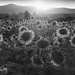

(75, 75)


In [ ]:
#Converter para tons de cinza

imgGrey_high = cv2.cvtColor(img_high,cv2.COLOR_BGR2GRAY)
cv2_imshow(imgGrey_high)
print(imgGrey_high.shape)
print('\n\n')

imgGrey_low = cv2.cvtColor(img_low,cv2.COLOR_BGR2GRAY)
cv2_imshow(imgGrey_low)
print(imgGrey_low.shape)

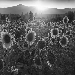

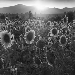

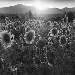

(75, 75)





In [ ]:
#Interpolação da imagem de alta definição 

#Nearest Neighbor

Near_ImgHigh = cv2.resize(imgGrey_high, None, fx= 0.09375, fy = 0.1407, interpolation = cv2.INTER_NEAREST )
cv2_imshow(Near_ImgHigh)

print('\n\n')

#Bilinear

BiLinear_ImgHigh = cv2.resize(imgGrey_high, None, fx= 0.09375, fy = 0.1407, interpolation = cv2.INTER_LINEAR )
cv2_imshow(BiLinear_ImgHigh)

print('\n\n')

#Bicubic

Bicubic_ImgHigh = cv2.resize(imgGrey_high, None, fx= 0.09375, fy = 0.1407, interpolation = cv2.INTER_CUBIC )
cv2_imshow(Bicubic_ImgHigh)
print(Bicubic_ImgHigh.shape)
print('\n\n')

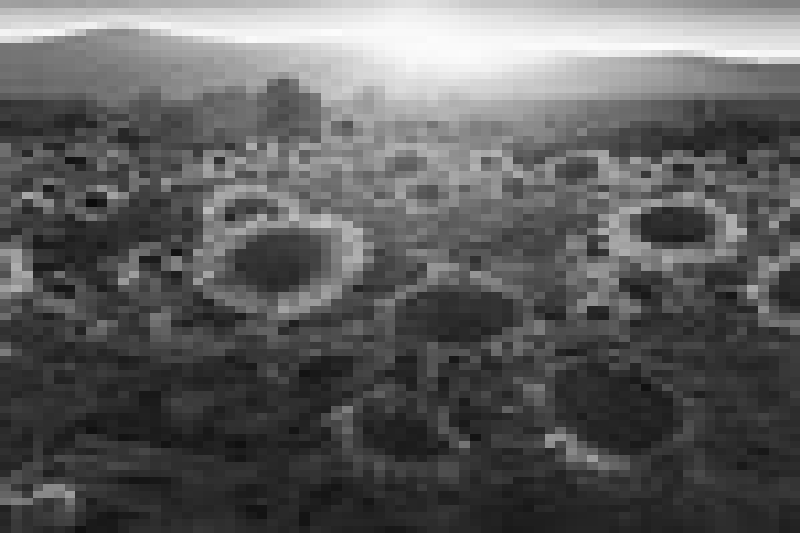

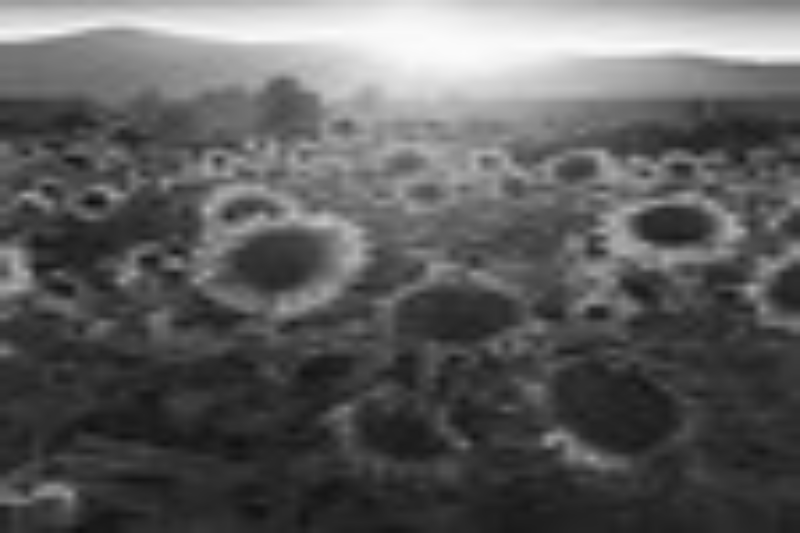

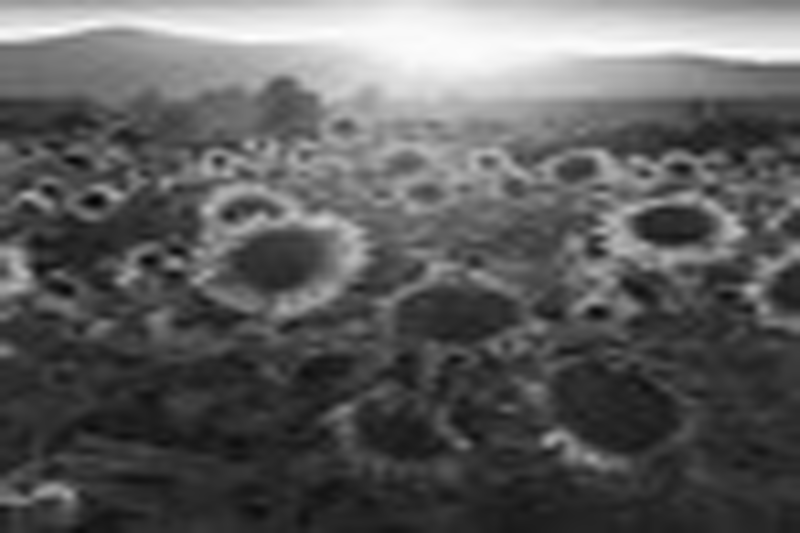

(533, 800)





In [ ]:
#Interpolação da imagem de baixa definição 

#Nearest Neighbor

Near_ImgLow = cv2.resize(imgGrey_low, None, fx= 10.6667, fy = 7.10667, interpolation = cv2.INTER_NEAREST )
cv2_imshow(Near_ImgLow)

print('\n\n')

#Bilinear

BiLinear_ImgLow = cv2.resize(imgGrey_low, None, fx= 10.6667, fy = 7.10667, interpolation = cv2.INTER_LINEAR )
cv2_imshow(BiLinear_ImgLow)

print('\n\n')

#Bicubic

Bicubic_ImgLow = cv2.resize(imgGrey_low, None, fx= 10.6667, fy = 7.10667, interpolation = cv2.INTER_CUBIC )
cv2_imshow(Bicubic_ImgLow)
print(Bicubic_ImgLow.shape)
print('\n\n')

In [ ]:
#Avaliação de SSIM

#Comparação entre a Interpolated_High_Resolution e a Original_Low 

(score_1,_) = structural_similarity(imgGrey_low, Near_ImgHigh, full=True)
print("Semelhança entre a imagem de baixa resolução original e a interpolação vizinha da imagem de alta resolução:",score_1)
print('\n\n')

(score_2,_) = structural_similarity(imgGrey_low, BiLinear_ImgHigh, full=True)
print("Semelhança entre a imagem de baixa resolução original e a interpolação bilinear da imagem de alta resolução:",score_2)
print('\n\n')

(score_3,_) = structural_similarity(imgGrey_low, Bicubic_ImgHigh, full=True)
print("Semelhança entre a imagem de baixa resolução original e a interpolação bicúbica da imagem de alta resolução:",score_3)
print('\n\n')

Semelhança entre a imagem de baixa resolução original e a interpolação vizinha da imagem de alta resolução: 0.23950963875086256



Semelhança entre a imagem de baixa resolução original e a interpolação bilinear da imagem de alta resolução: 0.28199801380844847



Semelhança entre a imagem de baixa resolução original e a interpolação bicúbica da imagem de alta resolução: 0.27561521702999536





In [ ]:
#Comparação entre a Interpolated_Low_Resolution e a Original_High 

(score_4,_) = structural_similarity(imgGrey_high, Near_ImgLow, full=True)
print("Semelhança entre a imagem de alta resolução original e a interpolação vizinha da imagem de baixa resolução:",score_4)
print('\n\n')

(score_5,_) = structural_similarity(imgGrey_high, BiLinear_ImgLow, full=True)
print("Semelhança entre a imagem de alta resolução original e a interpolação bilinear da imagem de baixa resolução:",score_5)
print('\n\n')

(score_6,_) = structural_similarity(imgGrey_high, Bicubic_ImgLow, full=True)
print("Semelhança entre a imagem de alta resolução original e a interpolação bicúbica da imagem de baixa resolução:",score_6)
print('\n\n')

Semelhança entre a imagem de alta resolução original e a interpolação vizinha da imagem de baixa resolução: 0.3623503955706394



Semelhança entre a imagem de alta resolução original e a interpolação bilinear da imagem de baixa resolução: 0.4157270790909335



Semelhança entre a imagem de alta resolução original e a interpolação bicúbica da imagem de baixa resolução: 0.4007336168001169



